## TASK1

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp
import plotly.express as px
import statsmodels.api as sm

In [4]:
df=pd.read_csv('mtcars.csv')

In [10]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## TASK2

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [7]:
df.isna().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

## TASK3

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,32.0,20.090625,6.026948,10.400,15.42500,19.200,22.80,33.900
cyl,32.0,6.187500,1.785922,4.000,4.00000,6.000,8.00,8.000
disp,32.0,230.721875,123.938694,71.100,120.82500,196.300,326.00,472.000
hp,32.0,146.687500,68.562868,52.000,96.50000,123.000,180.00,335.000
drat,32.0,3.596563,0.534679,2.760,3.08000,3.695,3.92,4.930
wt,32.0,3.217250,0.978457,1.513,2.58125,3.325,3.61,5.424
qsec,32.0,17.848750,1.786943,14.500,16.89250,17.710,18.90,22.900
vs,32.0,0.437500,0.504016,0.000,0.00000,0.000,1.00,1.000
am,32.0,0.406250,0.498991,0.000,0.00000,0.000,1.00,1.000
gear,32.0,3.687500,0.737804,3.000,3.00000,4.000,4.00,5.000


<AxesSubplot:>

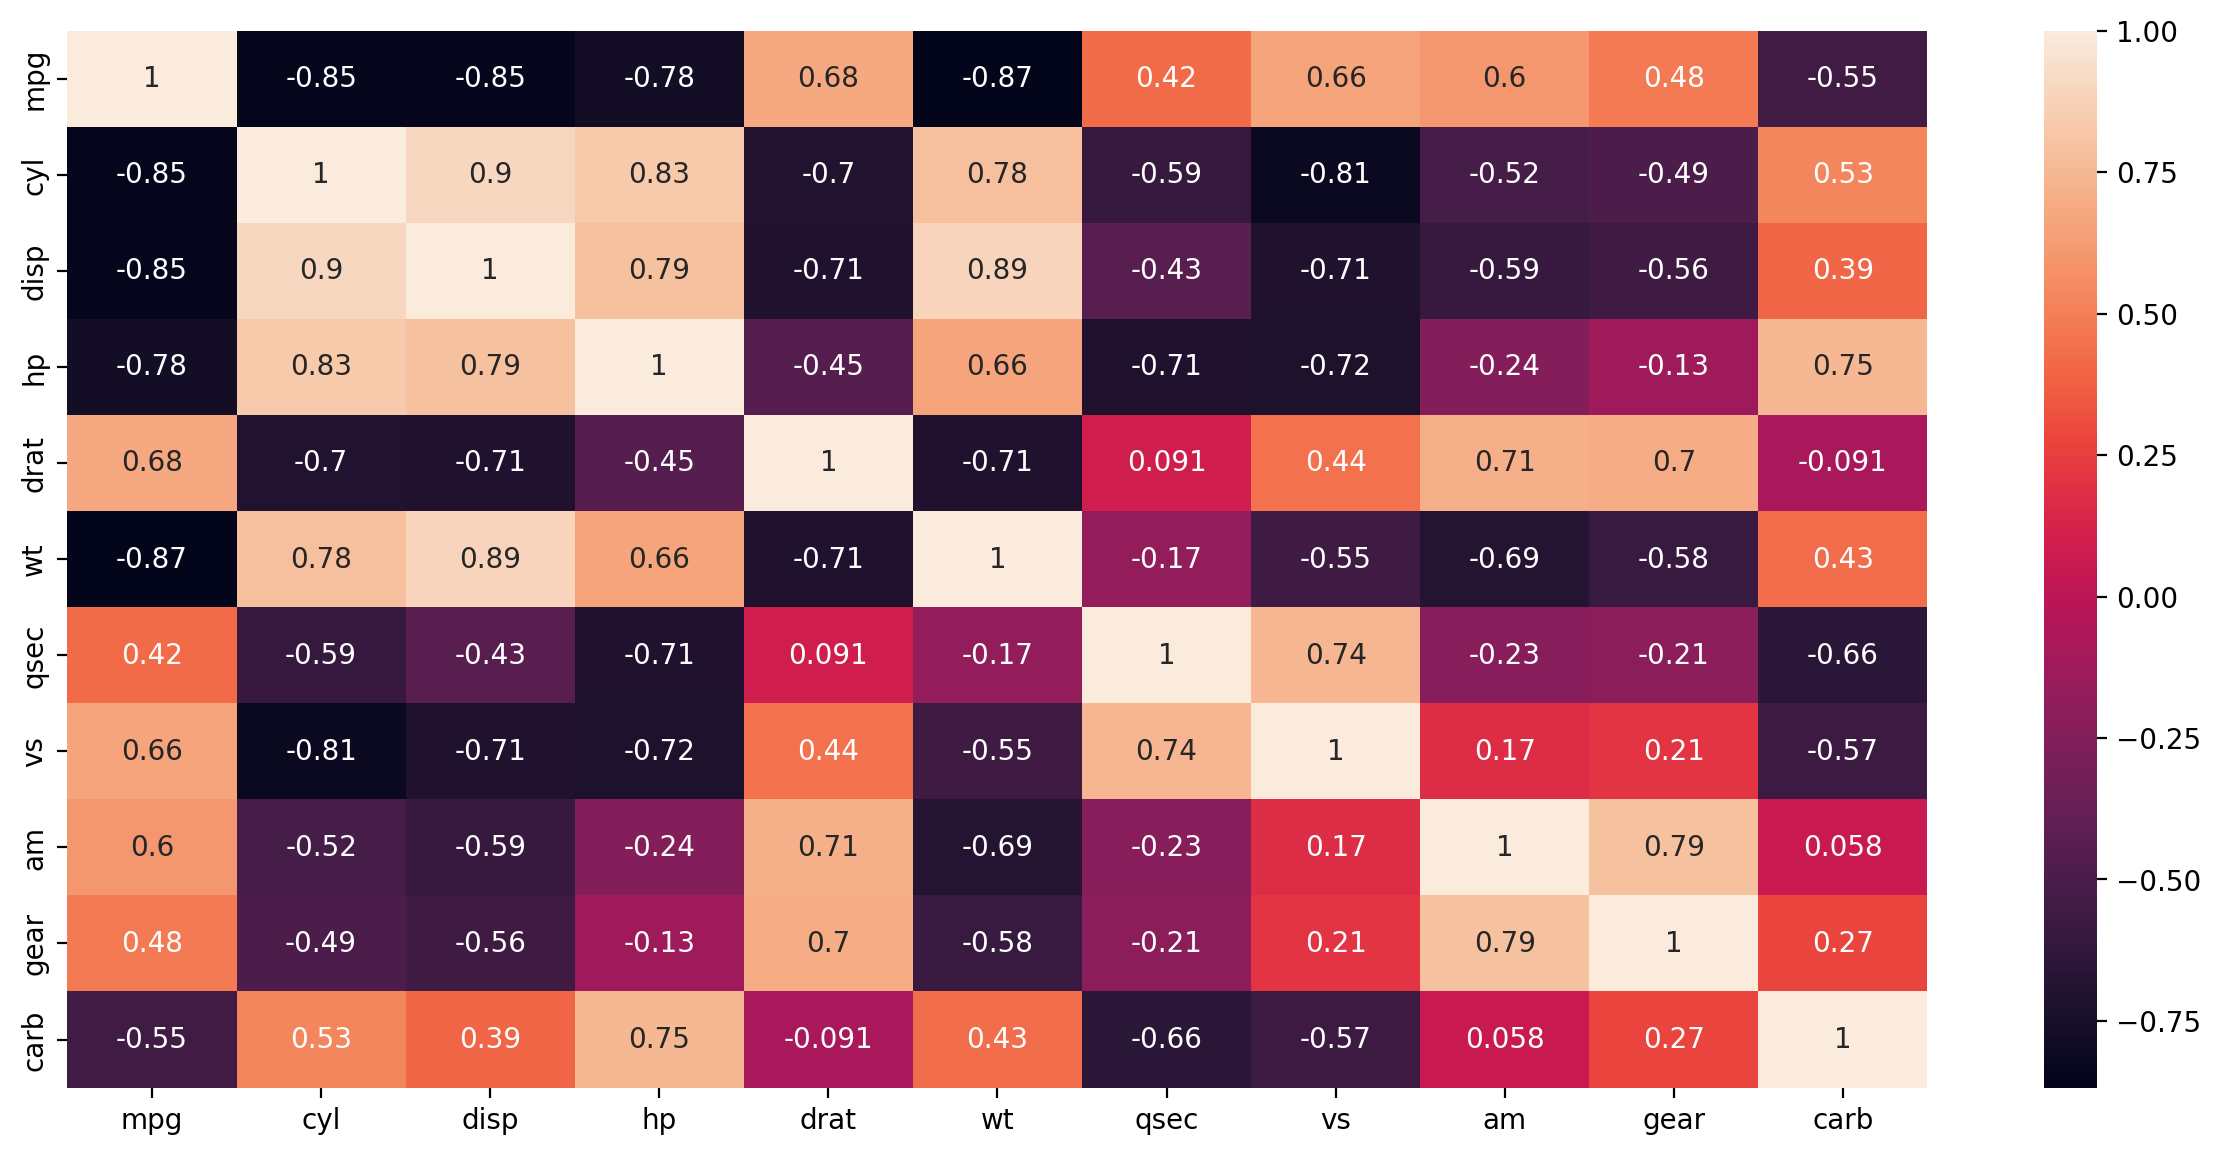

In [28]:
plt.figure(figsize=(15,7),dpi=200)
sns.heatmap(df.corr(),annot=True)

## Numerical features


In [24]:
list = ['mpg','disp','hp','drat','wt','qsec']
df2 = df[list]

In [25]:
df2.head()

,mpg,disp,hp,drat,wt,qsec
0,21.0,160.0,110,3.90,2.620,16.46
1,21.0,160.0,110,3.90,2.875,17.02
2,22.8,108.0,93,3.85,2.320,18.61
3,21.4,258.0,110,3.08,3.215,19.44
4,18.7,360.0,175,3.15,3.440,17.02


<AxesSubplot:>

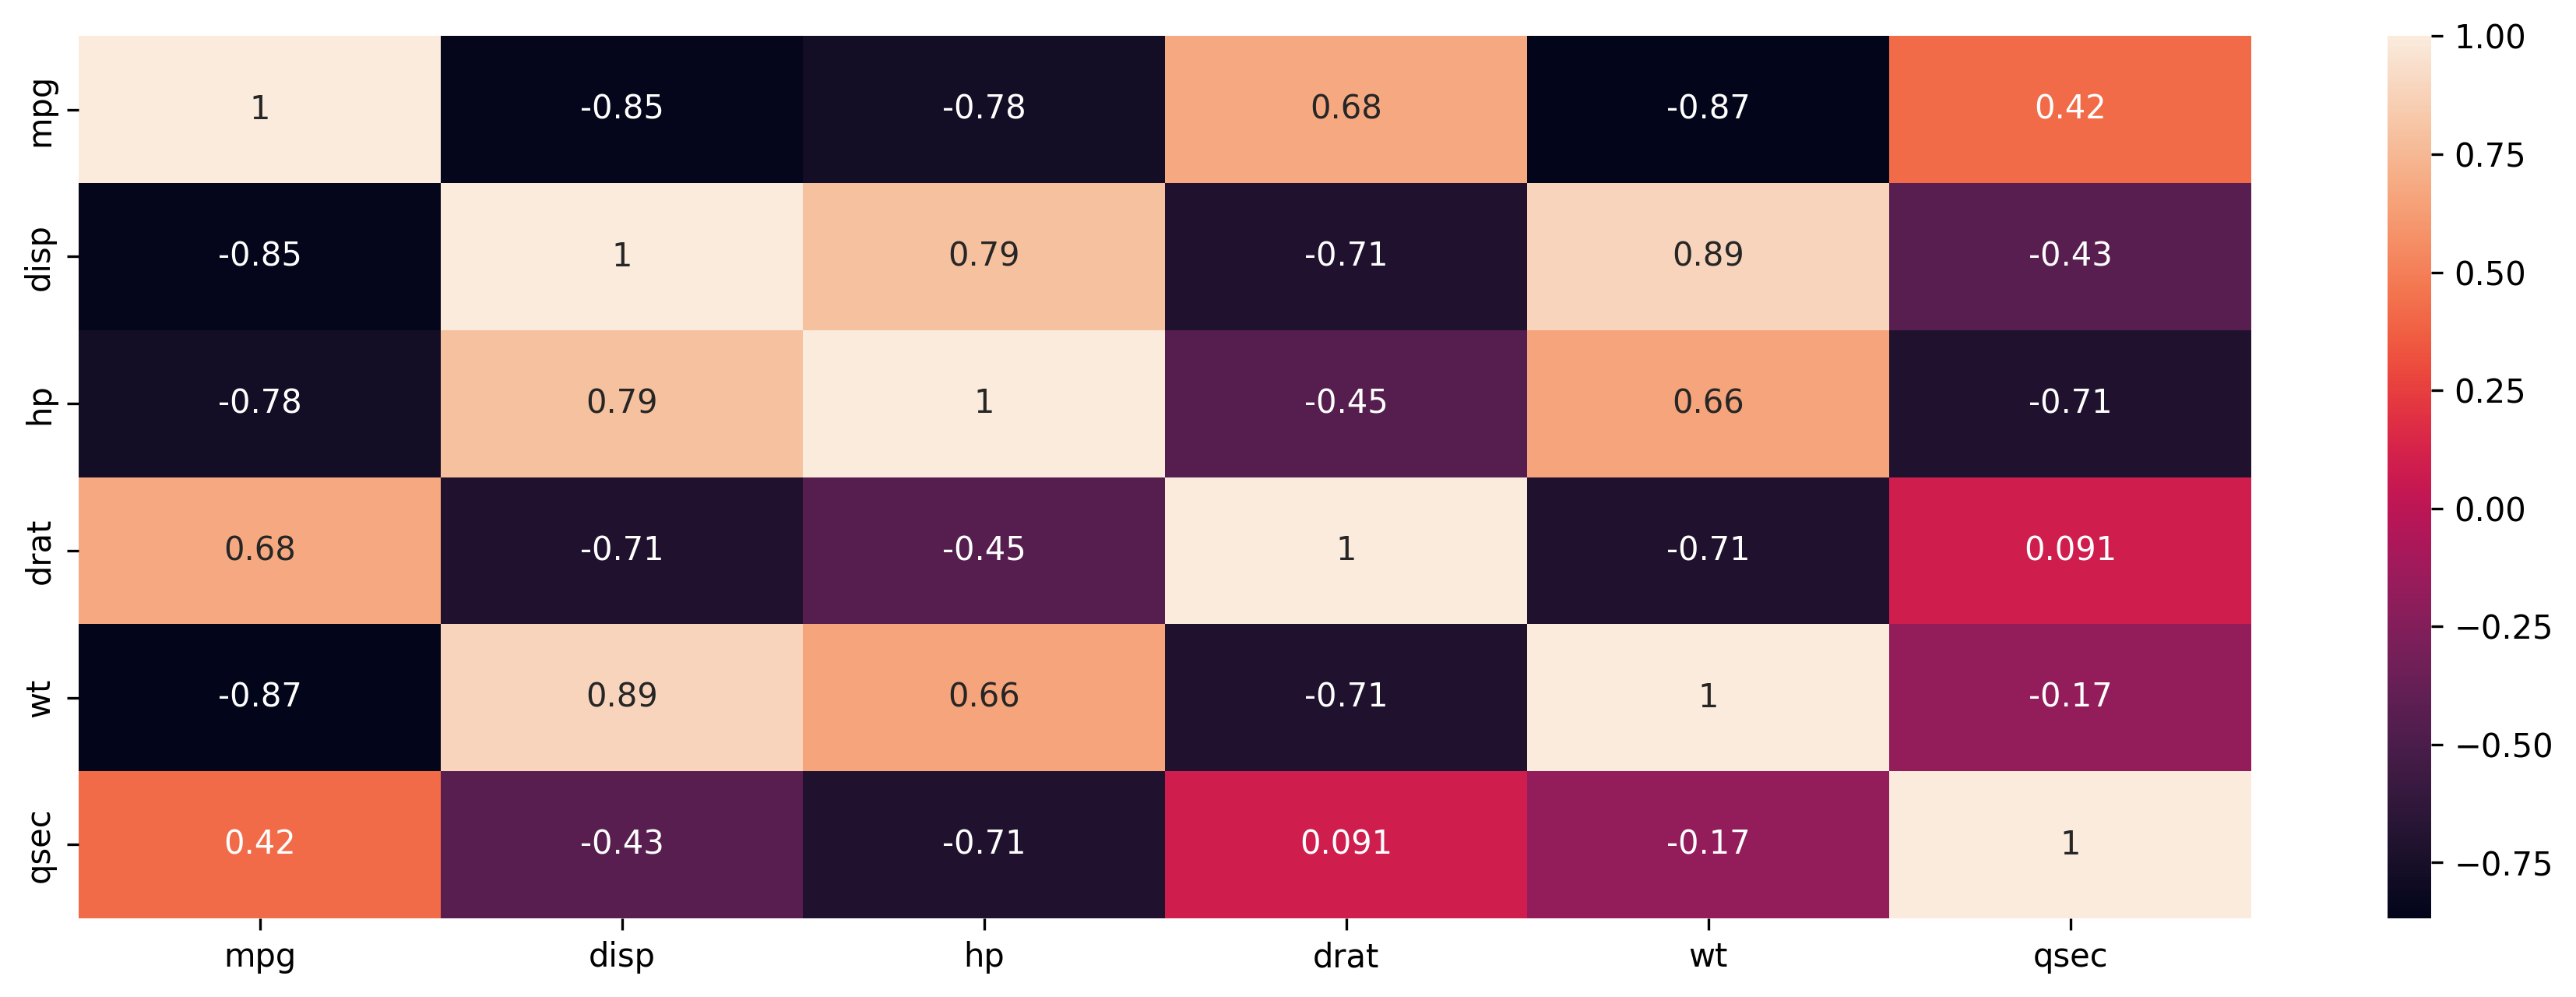

In [27]:
plt.figure(figsize=(15,5),dpi=300)
sns.heatmap(df2.corr(),annot=True)

In [40]:
rp.summarize(df["mpg"])

,Name,N,Mean,Median,Variance,SD,SE,95% Conf.,Interval
0,mpg,32.0,20.090625,19.2,36.324103,6.026948,1.065424,17.917679,22.263571


In [44]:
rp.summarize(df["disp"])

,Name,N,Mean,Median,Variance,SD,SE,95% Conf.,Interval
0,disp,32.0,230.721875,196.3,15360.799829,123.938694,21.909473,186.037211,275.406539


In [45]:
rp.summarize(df["hp"])

,Name,N,Mean,Median,Variance,SD,SE,95% Conf.,Interval
0,hp,32.0,146.6875,123.0,4700.866935,68.562868,12.120317,121.96795,171.40705


In [46]:
rp.summarize(df["drat"])


,Name,N,Mean,Median,Variance,SD,SE,95% Conf.,Interval
0,drat,32.0,3.596563,3.695,0.285881,0.534679,0.094519,3.40379,3.789335


In [47]:
rp.summarize(df["qsec"])

,Name,N,Mean,Median,Variance,SD,SE,95% Conf.,Interval
0,qsec,32.0,17.84875,17.71,3.193166,1.786943,0.31589,17.204488,18.493012


## Plotting Scatter Histogram for highly correlated features

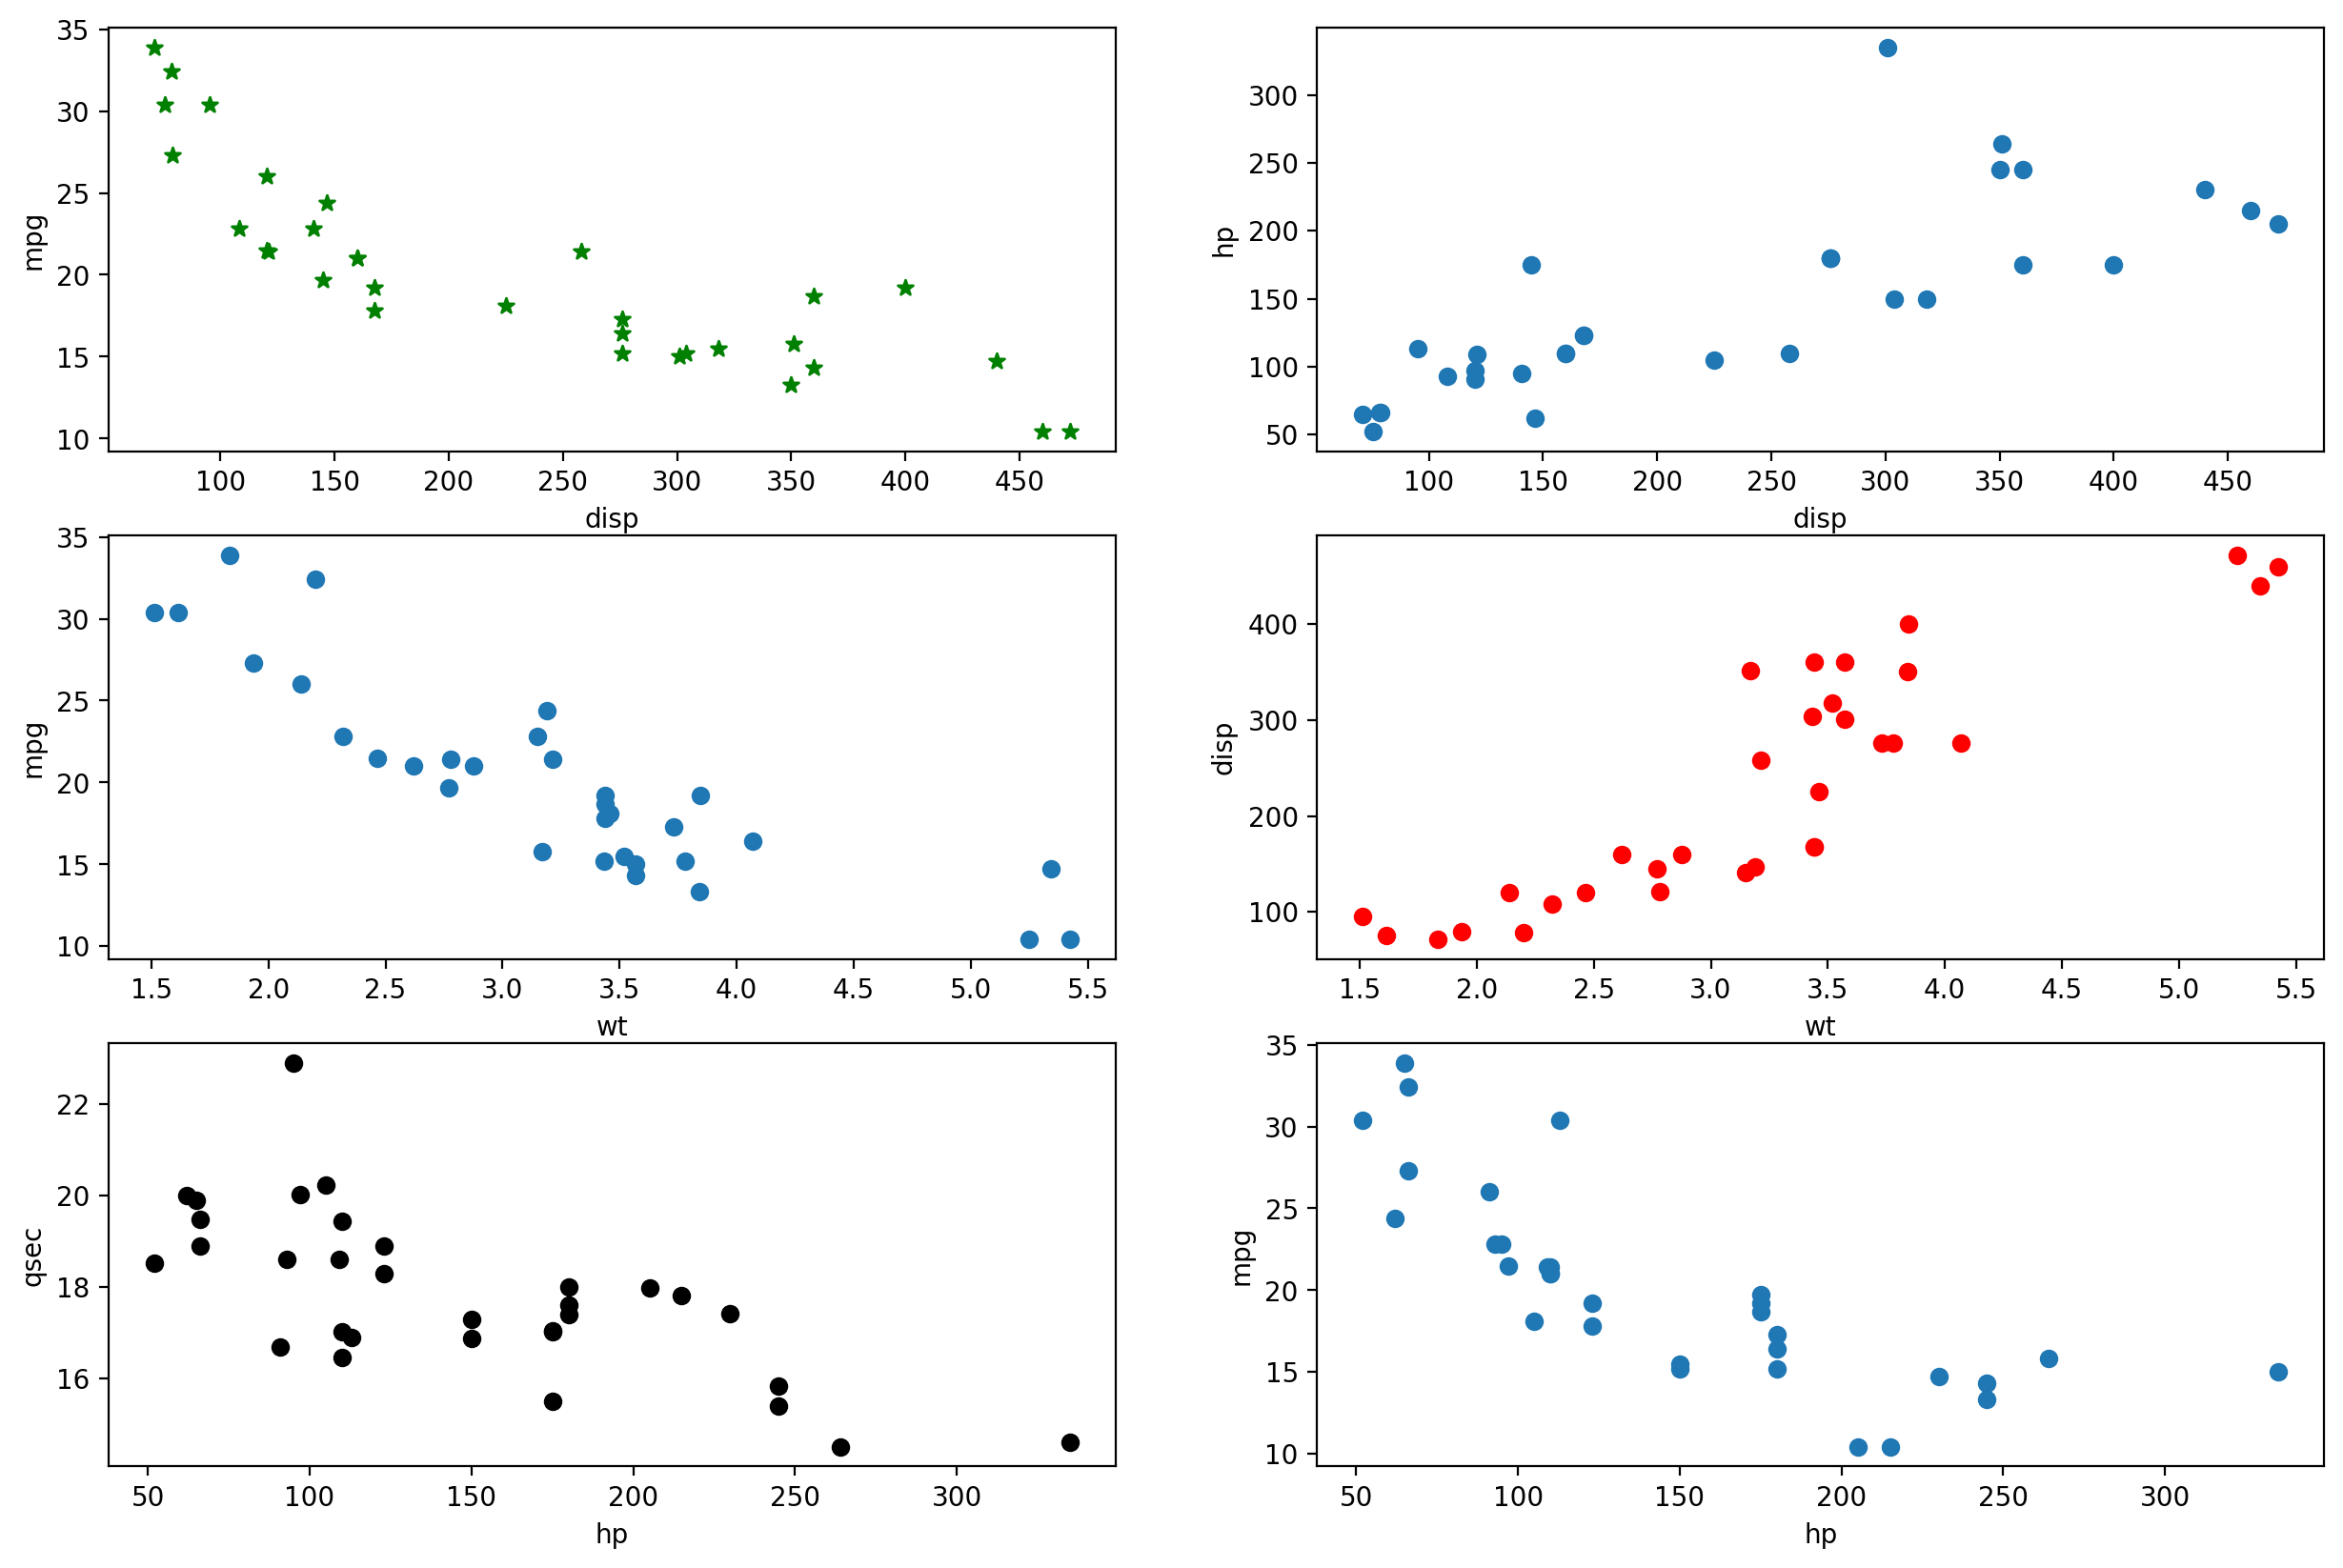

In [60]:
plt.figure(figsize=(15,10),dpi=200)

plt.subplot(3,2,1,xlabel='disp',ylabel='mpg')
plt.scatter(df['disp'],df['mpg'],marker='*',c='green')

plt.subplot(3,2,2,xlabel='disp',ylabel='hp')
plt.scatter(df['disp'],df['hp'])

plt.subplot(3,2,3, xlabel='wt',ylabel='mpg')
plt.scatter(df['wt'],df['mpg'])

plt.subplot(3,2,4, xlabel='wt',ylabel='disp')
plt.scatter(df['wt'],df['disp'],c='red')

plt.subplot(3,2,5, xlabel='hp',ylabel='qsec')
plt.scatter(df['hp'],df['qsec'],c='black')

plt.subplot(3,2,6, xlabel='hp',ylabel='mpg')
plt.scatter(df['hp'],df['mpg'])

plt.show()

## TASK4

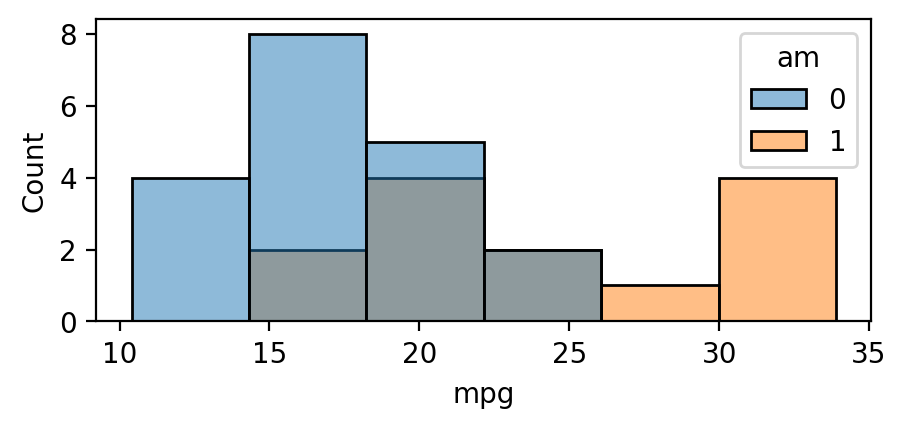

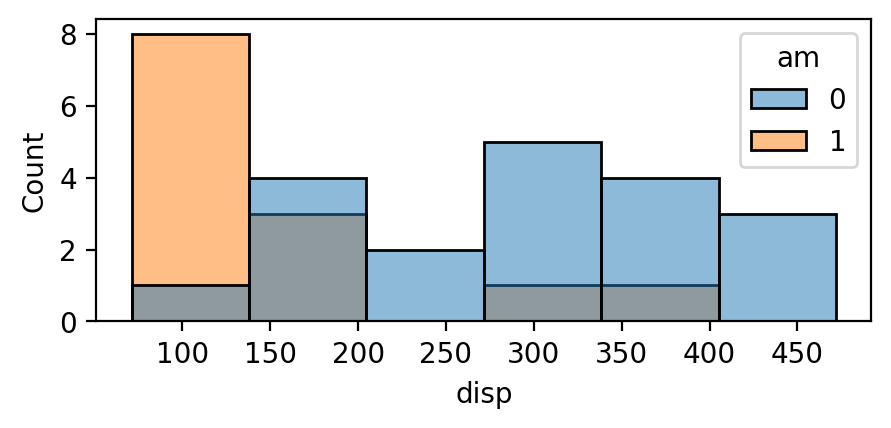

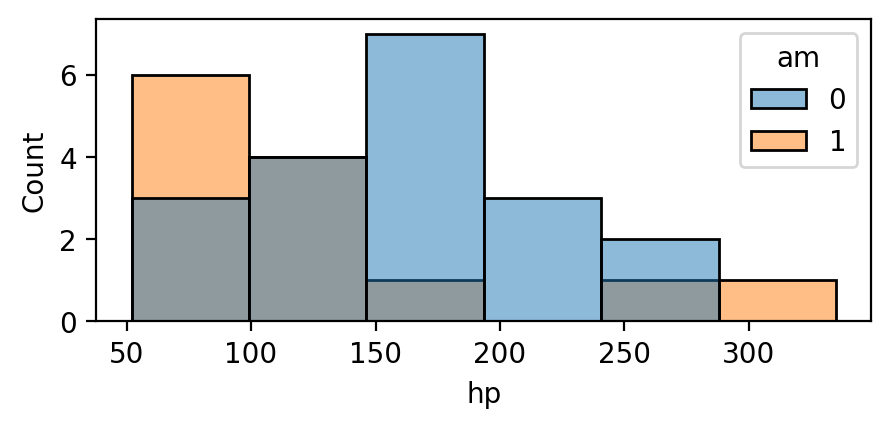

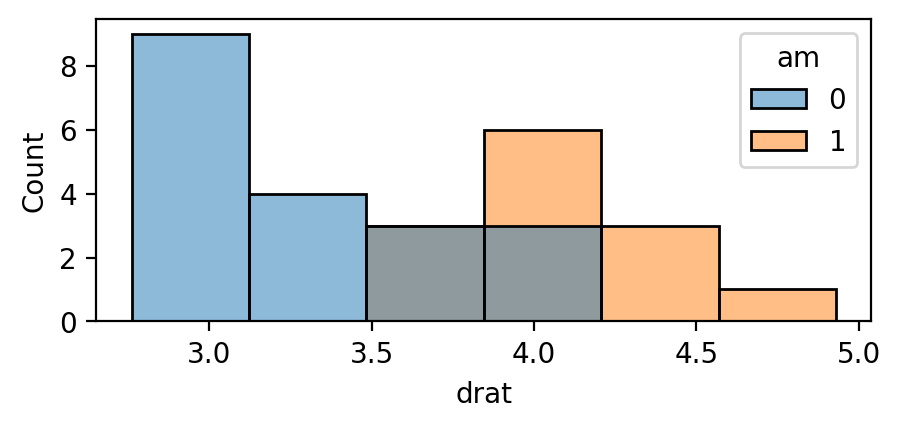

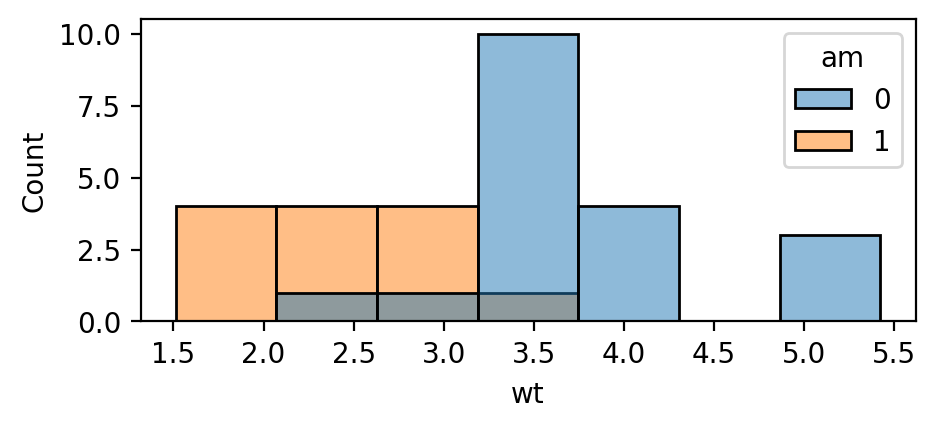

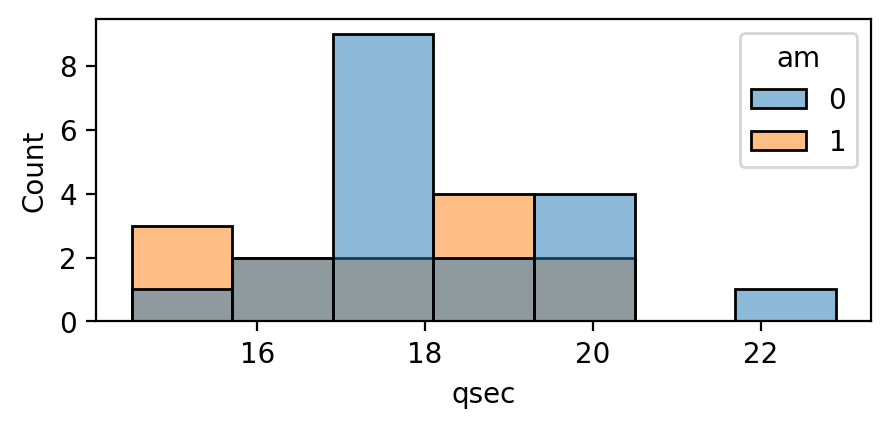

In [75]:
for i in list:
    plt.figure(figsize=(5,2),dpi=200)
    sns.histplot(x=df[i],hue=df['am'])
    plt.show()

In [88]:
for i in list:
    plot=px.histogram(df,x=df[i])
    plot.show()

## Categorical features

In [76]:
listc = ['cyl', 'vs', 'am','gear', 'carb']

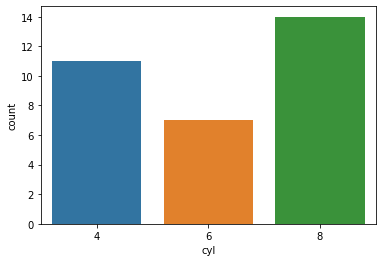

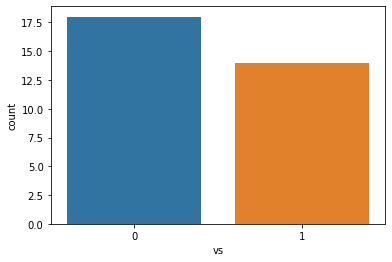

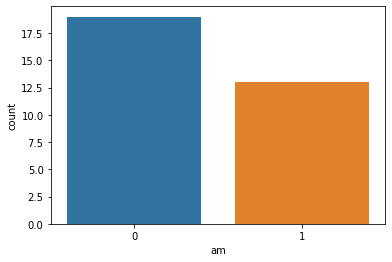

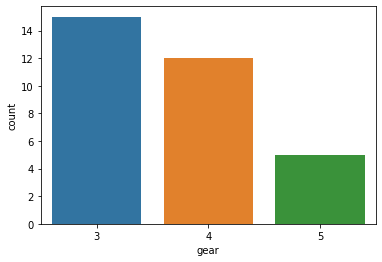

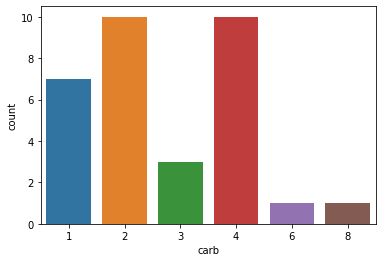

In [78]:
for i in listc:
    sns.countplot(x=df[i])
    plt.show()

## TASK5

In [ ]:
X = df.iloc[:,2:]
y = df['mpg']

In [102]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

/Users/sanan33/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              203.0
Date:                Tue, 20 Sep 2022   Prob (F-statistic):                    2.82e-19
Time:                        19:40:23   Log-Likelihood:                         -70.181
No. Observations:                  32   AIC:                                      160.4
Df Residuals:                      22   BIC:                                      175.0
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cyl            0.3508      0.763      0.460      0.650      -1.231       1.933
disp           0.0135      0.018      0.768      0.450      -0.023       0.050
hp            -0.0205      0.021     -0.958      0.348      -0.065       0.024
drat           1.2416      1.463      0.849      0.405      -1.792       4.275
wt            -3.8261      1.862     -2.054      0.052      -7.688       0.036
qsec           1.1914      0.459      2.593      0.017       0.239       2.144
vs             0.1897      2.068      0.092      0.928      -4.100       4.479
am             2.8322      1.975      1.434      0.166      -1.264       6.928
gear           1.0543      1.347      0.783      0.442      -1.739       3.847
carb          -0.2632      0.812     -0.324      0.749      -1.948       1.422
==============================================================================
Omnibus:                        1.401   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.496   Jarque-Bera (JB):                1.317
Skew:                           0.386   Prob(JB):                        0.518
Kurtosis:                       2.375   Cond. No.                     1.55e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Multiple Linear Regression

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [141]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,shuffle=True,random_state=100)

In [168]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)

In [169]:
evaluate = pd.DataFrame({'Actual':y_test,
                        'Predicted':y_pred})

<AxesSubplot:>

<Figure size 1200x800 with 0 Axes>

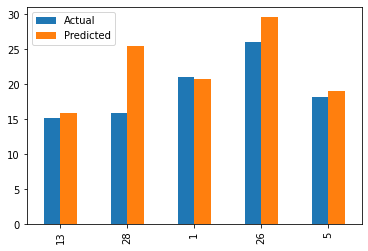

In [170]:
plt.figure(dpi=200)
evaluate.head().plot(kind='bar')

In [319]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [320]:
scoresLinreg = {'Mean Absolute Error':[mae],
                  'Mean Squared Error':[mse],
                  'Root Mean Squared Error':[rmse],
                 'R^2 Score':[r2],
               'Intercept':[model.fit(X_train,y_train).intercept_]}

In [352]:
linregdf= pd.DataFrame(data=scoresLinreg,index= ['Multiple Linear Regression'])

In [353]:
linregdf

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R^2 Score,Intercept
Multiple Linear Regression,2.723255,16.780891,4.096449,0.552592,-8.71509


### Ridge

In [322]:
from sklearn.linear_model import Ridge

In [323]:
ridge = Ridge(alpha=1)

In [324]:
ridge.fit(X_train,y_train)
y_predr = ridge.predict(X_test)

In [325]:
mae_r = mean_absolute_error(y_test,y_predr)
mse_r= mean_squared_error(y_test,y_predr)
rmse_r = np.sqrt(mse_r)
r2_r = r2_score(y_test,y_predr)

In [326]:
scoresRidge = {'Mean Absolute Error':[mae_r],
                  'Mean Squared Error':[mse_r],
                  'Root Mean Squared Error':[rmse_r],
                 'R^2 Score':[r2_r],
               'Intercept':[ridge.fit(X_train,y_train).intercept_]}

In [327]:
ridgedf = pd.DataFrame(data=scoresRidge,index  = ['Ridge'])

In [354]:
ridgedf

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R^2 Score,Intercept
Ridge,2.330067,9.382116,3.063024,0.749856,11.503306


### Lasso

In [328]:
from sklearn.linear_model import Lasso

In [329]:
lasso = Lasso(alpha=1)

In [330]:
lasso.fit(X_train,y_train)
y_predl = lasso.predict(X_test)

In [331]:
mae_l = mean_absolute_error(y_test,y_predl)
mse_l= mean_squared_error(y_test,y_predl)
rmse_l = np.sqrt(mse_l)
r2_l = r2_score(y_test,y_predl)

In [332]:
scoresLasso = {'Mean Absolute Error':[mae_l],
                  'Mean Squared Error':[mse_l],
                  'Root Mean Squared Error':[rmse_l],
                 'R^2 Score':[r2_l],
               'Intercept':[lasso.fit(X_train,y_train).intercept_]}

In [333]:
lassodf = pd.DataFrame(data=scoresLasso,index = ['Lasso'])

In [355]:
lassodf

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R^2 Score,Intercept
Lasso,2.909733,10.581464,3.252916,0.717879,29.839344


### ElasticNet

In [334]:
from sklearn.linear_model import ElasticNet

In [335]:
elastic = ElasticNet()
elastic.fit(X_train,y_train)
y_pred_el = elastic.predict(X_test)

In [336]:
mae_el = mean_absolute_error(y_test,y_pred_el)
mse_el= mean_squared_error(y_test,y_pred_el)
rmse_el = np.sqrt(mse_el)
r2_el = r2_score(y_test,y_pred_el)

In [337]:
scoresElasticNet = {'Mean Absolute Error':[mae_el],
                  'Mean Squared Error':[mse_el],
                  'Root Mean Squared Error':[rmse_el],
                 'R^2 Score':[r2_el],
               'Intercept':[elastic.fit(X_train,y_train).intercept_]}

In [338]:
elasticdf  = pd.DataFrame(data=scoresElasticNet,index = ['ElasticNet'])

In [356]:
elasticdf

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R^2 Score,Intercept
ElasticNet,2.726253,9.96829,3.15726,0.734228,30.240847


In [339]:
result_scores = pd.concat([linregdf,ridgedf,lassodf,elasticdf],axis=0)

In [340]:
coef_linreg = pd.Series(linreg.fit(X_train,y_train).coef_,index=[index1])
coef_ridge = pd.Series(ridge.fit(X_train,y_train).coef_,index =[index1] )
coef_lasso =  pd.Series(lasso.fit(X_train,y_train).coef_,index=[index1])
coef_elastic = pd.Series(elastic.fit(X_train,y_train).coef_,index=[index1])

In [300]:
#index1 = ['cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']

In [286]:
#columns1 = ['Multiple Linear Regression','Ridge','Lasso','ElasticNet']

In [304]:
linregcoef_=coef_linreg.to_frame(name = 'Multiple Linear Regression')
ridgecoef = coef_ridge.to_frame(name='Ridge')
lassocoef = coef_lasso.to_frame(name='Lasso')
elasticcoef = coef_elastic.to_frame(name='ElasticNet')

### Models' coefficient,intercept and metric values

In [341]:
coef_scores=pd.concat([linregcoef_,ridgecoef,lassocoef,elasticcoef],axis=1)

In [342]:
coef_scores

,Multiple Linear Regression,Ridge,Lasso,ElasticNet
cyl,0.661977,0.006610,-0.000000,-0.000000
disp,0.011525,0.003391,-0.028717,-0.028458
hp,-0.006412,-0.007971,-0.022167,-0.015422
drat,2.449429,0.825079,0.000000,0.000000
wt,-2.854485,-2.321066,-0.000000,-0.220686
qsec,0.732306,0.405266,-0.000000,-0.000000
vs,-0.428469,-0.077467,0.000000,0.000000
am,0.811424,1.085327,0.000000,0.000000
gear,4.072196,2.458841,0.000000,0.000000
carb,-1.643825,-1.132412,-0.000000,-0.267807


In [343]:
result_scores

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R^2 Score,Intercept
Multiple Linear Regression,2.723255,16.780891,4.096449,0.552592,-8.715090
Ridge,2.330067,9.382116,3.063024,0.749856,11.503306
Lasso,2.909733,10.581464,3.252916,0.717879,29.839344
ElasticNet,2.726253,9.968290,3.157260,0.734228,30.240847


### As we can see better regression model is Ridge 